In [3]:
import pandas as pd

try:
  nutri = pd.read_excel("nutrition_elderly.xls") 
  print(nutri.head()) 
except FileNotFoundError:
  print("Error: nutrition_elderly.xls not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

   gender  situation  tea  coffee  height  weight  age  meat  fish  raw_fruit  \
0       2          1    0       0     151      58   72     4     3          1   
1       2          1    1       1     162      60   68     5     2          5   
2       2          1    0       4     162      75   78     3     1          5   
3       2          1    0       0     154      45   91     0     4          4   
4       2          1    2       1     154      50   65     5     3          5   

   cooked_fruit_veg  chocol  fat  
0                 4       5    6  
1                 5       1    4  
2                 2       5    4  
3                 0       3    2  
4                 5       3    2  


In [4]:
pd.set_option('display.max_columns',8)
nutri.head(3)

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,...,1,4,5,6
1,2,1,1,1,...,5,5,1,4
2,2,1,0,4,...,5,2,5,4


In [5]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [6]:
DICT={1:'male',2:'female'}
nutri['gender']=nutri['gender'].replace(DICT).astype('category')
nutri['height']=nutri['height'].astype(float)
nutri.to_csv('nutri.csv',index=False)

SUMMARY TABLES

In [7]:
nutri=pd.read_csv('nutri.csv')
nutri['fat'].describe()

count    226.000000
mean       3.814159
std        1.473009
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: fat, dtype: float64

In [8]:
nutri.fat.value_counts()
#nutri.fat is same as nutri['fat]

fat
4    68
3    48
5    40
2    27
6    23
1    15
8     4
7     1
Name: count, dtype: int64

In [9]:
pd.crosstab(nutri.gender,nutri.situation)

situation,1,2,3
gender,,,
female,78,56,7
male,20,63,2


In [10]:
pd.crosstab(nutri.gender,nutri.situation,margins=True)

situation,1,2,3,All
gender,,,,
female,78,56,7,141
male,20,63,2,85
All,98,119,9,226


In [11]:
nutri['height'].mean()

np.float64(163.96017699115043)

In [12]:
nutri['height'].quantile(q=[0.25,0.50,0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [13]:
nutri['height'].max()-nutri['height'].min()

np.float64(48.0)

In [14]:
round(nutri['height'].var(),2)

np.float64(81.06)

In [15]:
round(nutri['height'].std(),2)

np.float64(9.0)

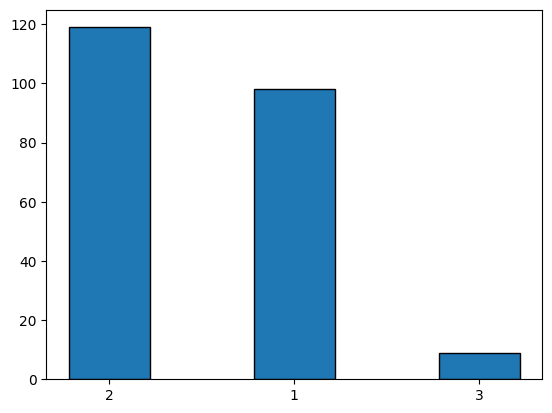

In [16]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
width=0.35
x=[0,0.8,1.6]
situation_counts=nutri['situation'].value_counts()
plt.bar(x,situation_counts,width,edgecolor='black')
plt.xticks(x,situation_counts.index)
plt.show()

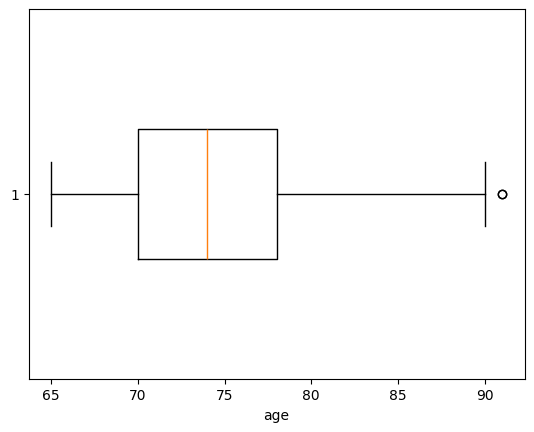

In [17]:
plt.boxplot(nutri['age'],widths=width,vert=False)
plt.xlabel('age')
plt.show()

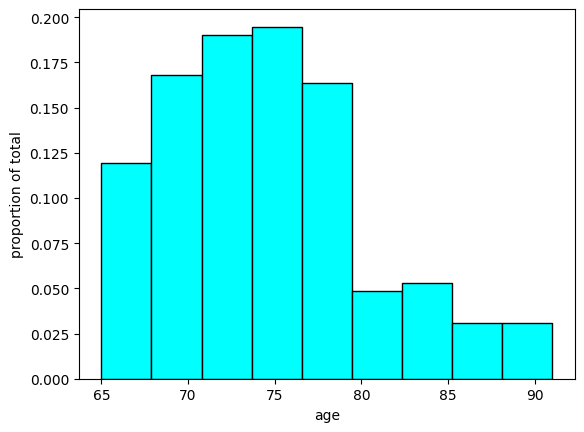

In [18]:
weights=np.ones_like(nutri.age)/nutri.age.count()
plt.hist(nutri.age,bins=9,weights=weights,facecolor='cyan',edgecolor='black',linewidth=1)
plt.xlabel('age')
plt.ylabel('proportion of total')
plt.show()

EMPIRICAL CUMULATIVE DISTRIBUTION FUNCTION

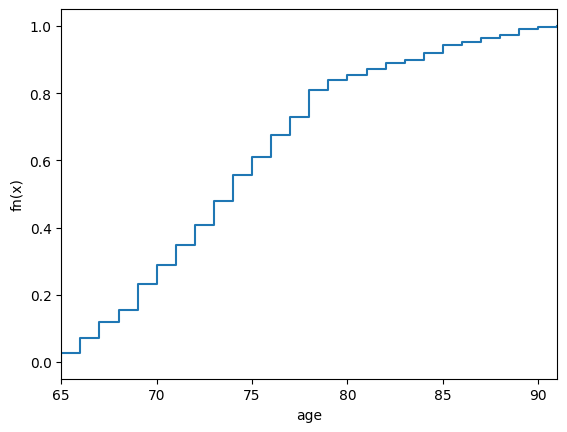

In [19]:
x=np.sort(nutri.age)
y=np.linspace(0,1,len(nutri.age))
plt.xlabel('age')
plt.ylabel('fn(x)')
plt.step(x,y)
plt.xlim(x.min(),x.max())
plt.show()

TWO WAYPLOTS FOR TWO CATEGORICAL VARIABLES

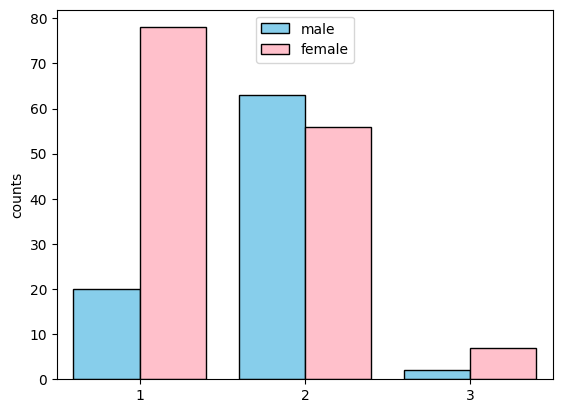

In [20]:
import seaborn as sns
sns.countplot(x='situation',hue='gender',data=nutri,hue_order=['male','female'],
              palette=['skyBlue','pink'],saturation=1,edgecolor='black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('counts')
plt.show()

PLOTS FOR TWO QUANTITATIVE VARIABLES USING A SCATTER PLOT

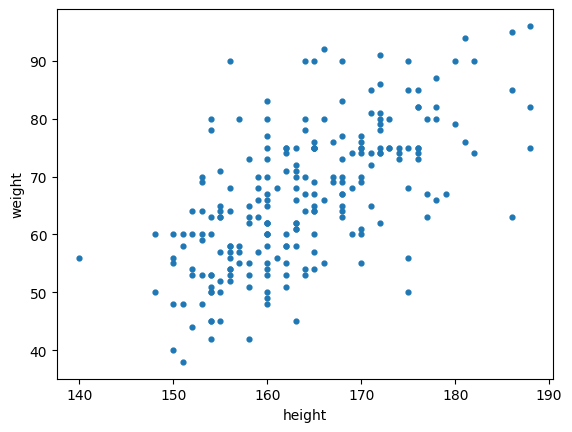

In [30]:
plt.scatter(nutri.height,nutri.weight,s=12)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

PLOTS FOR ONE QUALITATIVE AND ONE QUANTITATIVE VARIABLE 

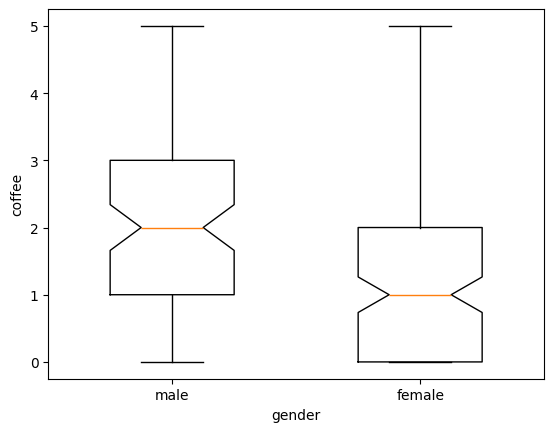

In [31]:
males=nutri[nutri.gender=='male']
females=nutri[nutri.gender=='female']
plt.boxplot([males.coffee,females.coffee],notch=True,widths=(0.5,0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks([1,2],['male','female'])
plt.show()